<a href="https://colab.research.google.com/github/krishkp22/Assignment/blob/main/IoT_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> IoT Assignment - Topic 24: Corona Virus Visualization</h2>
<h3> Objectives are:<br>

*   Prediction of recovered cases
*   Prediction of deaths
*   Prediction of confirmed cases 
*   7 day visualisation of the cases

<h3> Done by: <br>Krishna Prasad


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the required libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
import sklearn
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import datetime,operator

### Importing the data

In [3]:
confirmed_cases=pd.read_csv("/content/drive/MyDrive/dataset/time_series_covid_19_confirmed.csv")
deaths_cases=pd.read_csv("/content/drive/MyDrive/dataset/time_series_covid_19_deaths.csv")
recovered_cases=pd.read_csv("/content/drive/MyDrive/dataset/time_series_covid_19_recovered.csv")

In [4]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33045,33058,33058,33064,33114,33118,33308,33354,33447,33516,33561,33614,33760,33790,33824,33831,34010,34023,34129,34150,34217,34237,34239,34258,34321,34326,34342,34355,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036,35067,35092
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9115,9215,9304,9406,9500,9585,9675,9762,9864,9957,10001,10071,10167,10225,10341,10395,10466,10548,10654,10705,10808,10893,11007,11097,11189,11246,11367,11473,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667,12767,12889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36857,36958,37067,37170,37170,37382,37492,37603,37603,37856,37971,38088,38215,38346,38482,38618,38788,38932,39095,39273,39444,39635,39635,40014,40201,40395,40577,40577,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779,44199,44633
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1715,1715,1814,1814,1814,1928,1928,2011,2011,2057,2057,2057,2273,2273,2470,2470,2729,2729,2729,2957,3029,3144,3260,3377,3475,3475,3548,3627,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675,4675,4747
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2598,2635,2685,2716,2743,2744,2761,2801,2928,3012,3022,3030,3031,3037,3040,3305,3384,3461,3508,3530,3647,3693,3736,4107,4523,4920,5172,5230,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326,6345,6444


In [6]:
deaths_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511,1514,1518,1523,1529,1532,1533,1536,1536,1541,1544,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,407,411,413,416,420,424,429,434,439,443,448,451,454,458,462,465,469,473,477,480,487,493,499,502,509,518,527,532,536,543,549,557,559,571,579,590,598,605,612,623
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907,1914,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,54,55,55,55,57,57,59,59,59,59,59,62,62,63,63,69,69,69,72,72,72,73,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,211,208,212,218,218,219,222,227,228,234,241,247,248,251,255,260,265,267,268,270,271,275,275,279,284,286,289,291,296,299,300,303,307,308,308,312,315,317,322,322


In [7]:
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20', '11/11/20',
       '11/12/20', '11/13/20', '11/14/20', '11/15/20'],
      dtype='object', length=303)

In [8]:
recovered=recovered_cases.loc[:,cols[4]:cols[-1]]
deaths=deaths_cases.loc[:,cols[4]:cols[-1]]
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [9]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
recoverd_sum=[]
mortality_rate=[]
total_recoverd=[]

for i in dates:
    
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recoverd.append(recovered_sum)

In [10]:
confirmed_sum,death_sum,recovered_sum

(54370186, 1317139, 34955148)

In [13]:
FromDayOne=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recoverd=np.array(total_recoverd).reshape(-1,1)

days_in_fututer=10
future_forecast=np.array([i for i in range(len(dates)+days_in_fututer)]).reshape(-1,1)
ad_dates=future_forecast[:-10]


start='1/22/2020'
start_date=datetime.datetime.strptime(start,"%m/%d/%Y")
future_forecast_dates=[]
for i in range(len(future_forecast)):
     future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
        
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_cases[dates[-1]]
latest_recoverd=recovered_cases[dates[-1]]

In [14]:
unique_countries=list(confirmed_cases['Country/Region'].unique())

In [17]:
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases >0  :
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(cases)

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases), key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [18]:
unique_provinces=list(confirmed_cases['Province/State'].unique())
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases >0  :
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(cases)

In [19]:
nan_indices=[]
for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

### Cases per countries 


In [28]:
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}  :  {country_confirmed_cases[i]} cases')

US  :  11036935 cases
India  :  8845127 cases
Brazil  :  5863093 cases
France  :  1915713 cases
Russia  :  1910149 cases
Spain  :  1458591 cases
United Kingdom  :  1372884 cases
Argentina  :  1310491 cases
Colombia  :  1198746 cases
Italy  :  1178529 cases
Mexico  :  1006522 cases
Peru  :  934899 cases
Germany  :  802946 cases
Iran  :  762068 cases
South Africa  :  751024 cases
Poland  :  712972 cases
Ukraine  :  551533 cases
Belgium  :  535939 cases
Chile  :  531273 cases
Iraq  :  519152 cases
Indonesia  :  467113 cases
Czechia  :  460116 cases
Netherlands  :  454961 cases
Bangladesh  :  432333 cases
Turkey  :  414278 cases
Philippines  :  407838 cases
Romania  :  360281 cases
Pakistan  :  359032 cases
Saudi Arabia  :  353255 cases
Israel  :  323741 cases
Canada  :  299422 cases
Morocco  :  293177 cases
Switzerland  :  257135 cases
Portugal  :  217301 cases
Nepal  :  209776 cases
Austria  :  203956 cases
Ecuador  :  180295 cases
Sweden  :  177355 cases
United Arab Emirates  :  150345 

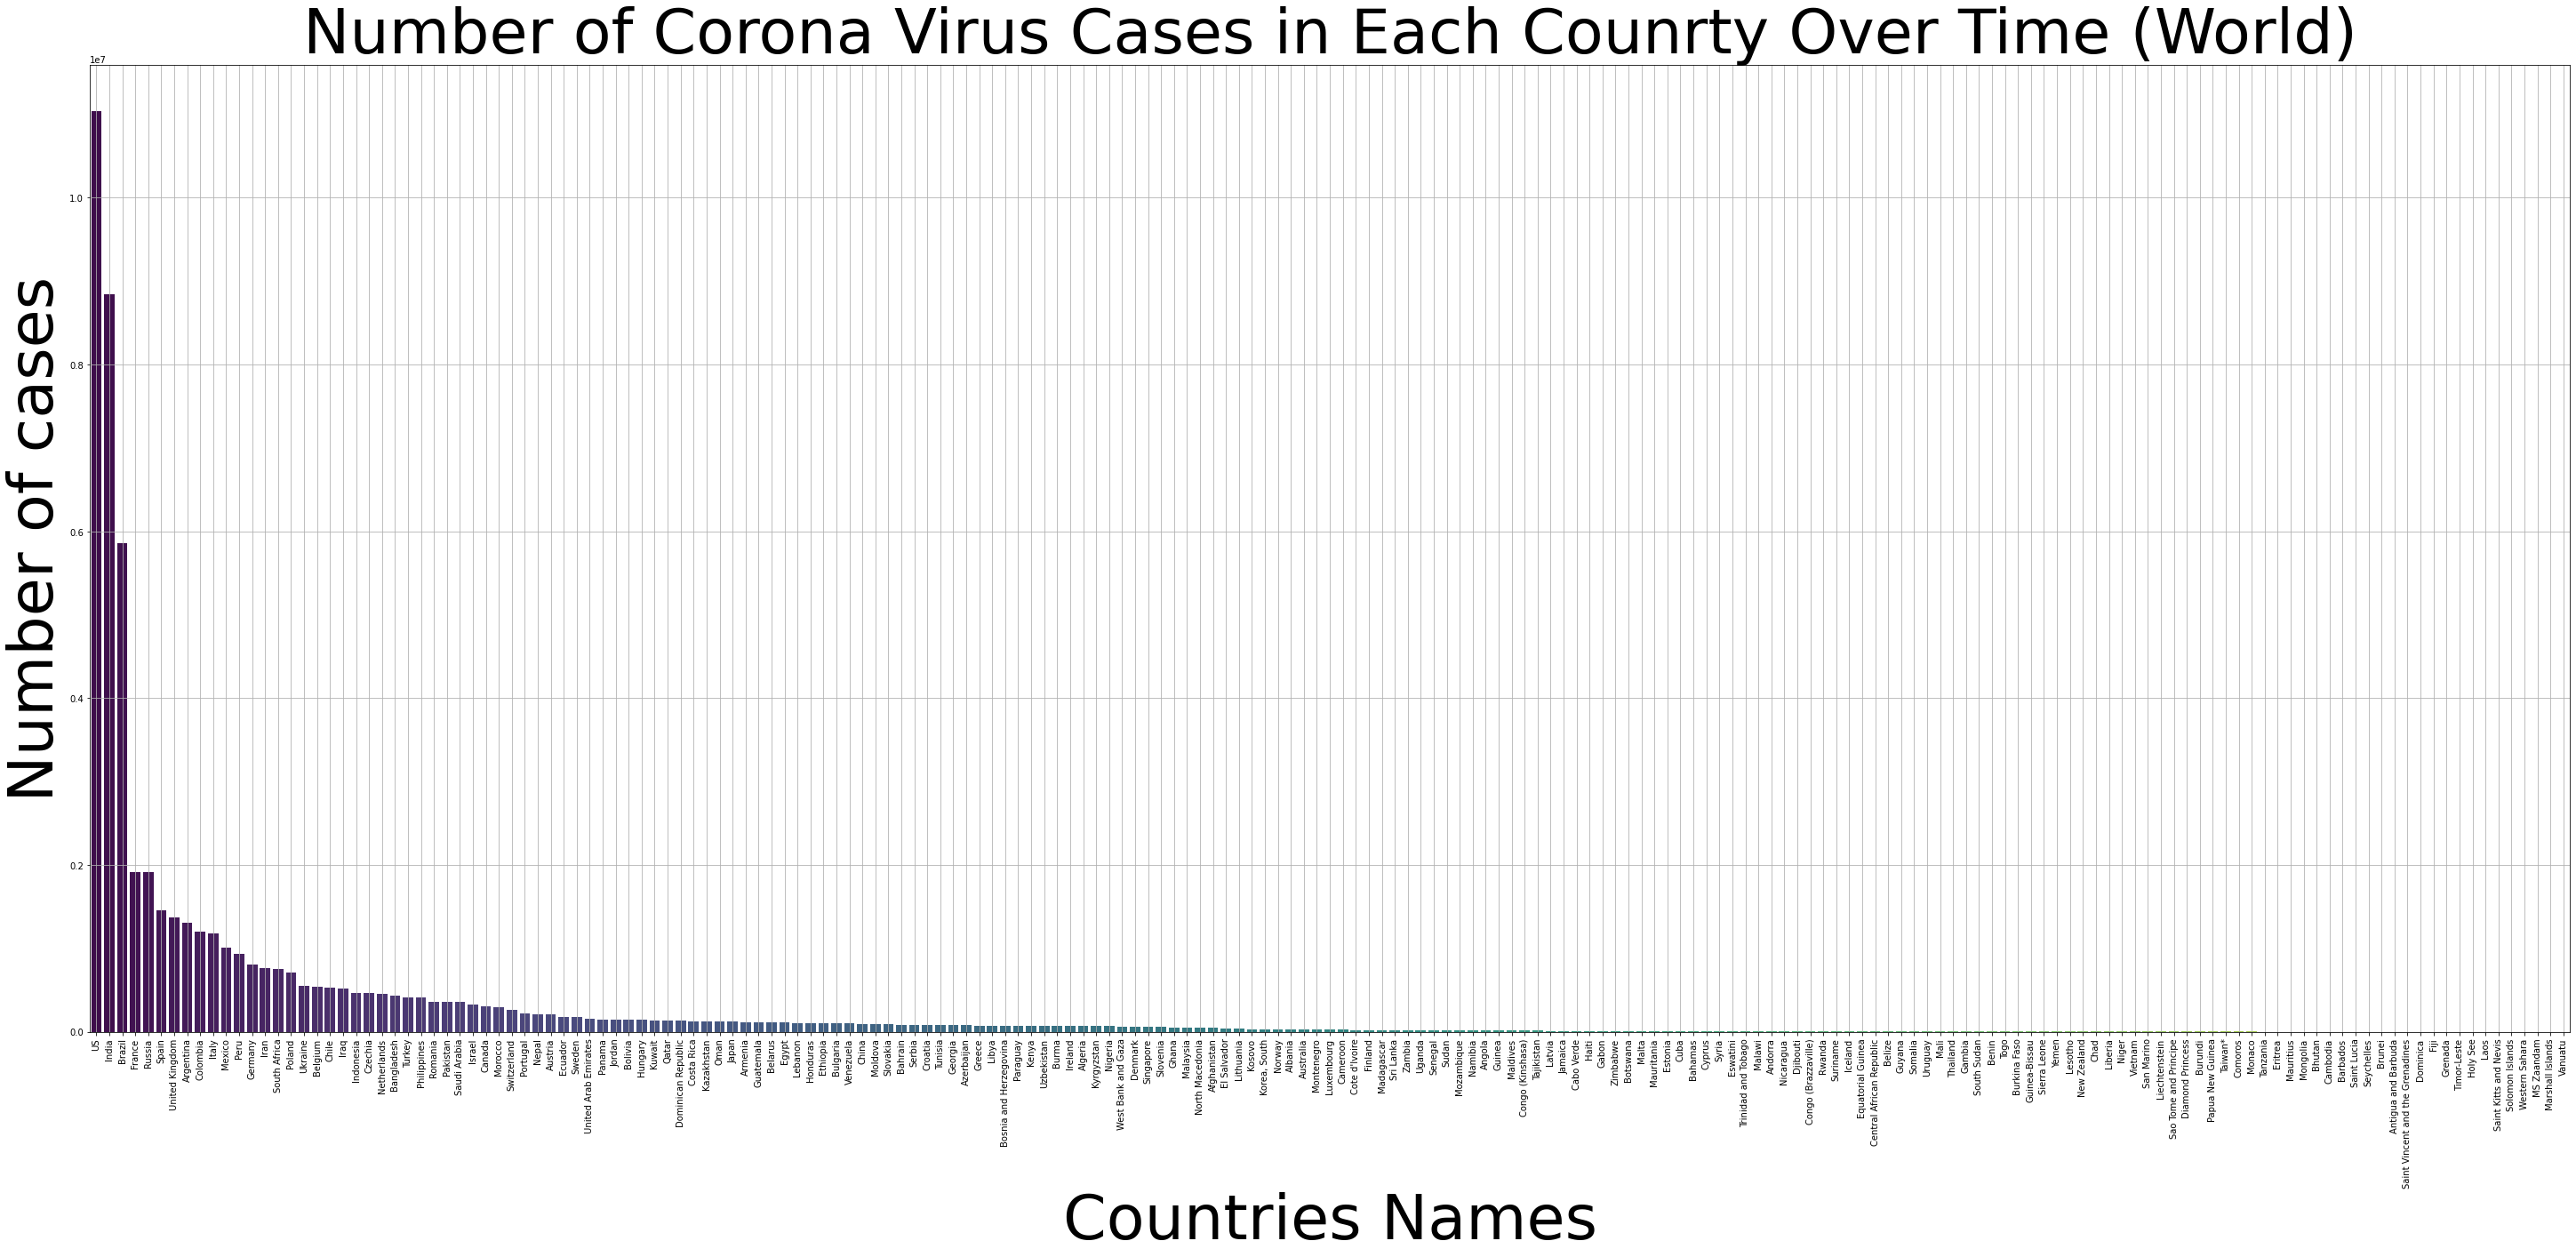

In [29]:
plt.figure(figsize=(50,20))
sns.barplot(x=unique_countries,y=country_confirmed_cases,palette='viridis')
plt.title("Number of Corona Virus Cases in Each Counrty Over Time (World)",size=70)
plt.ylabel(" Number of cases",size=70)
plt.xlabel("Countries Names",size=70)
plt.xticks(rotation= 90)
plt.grid()
plt.show()

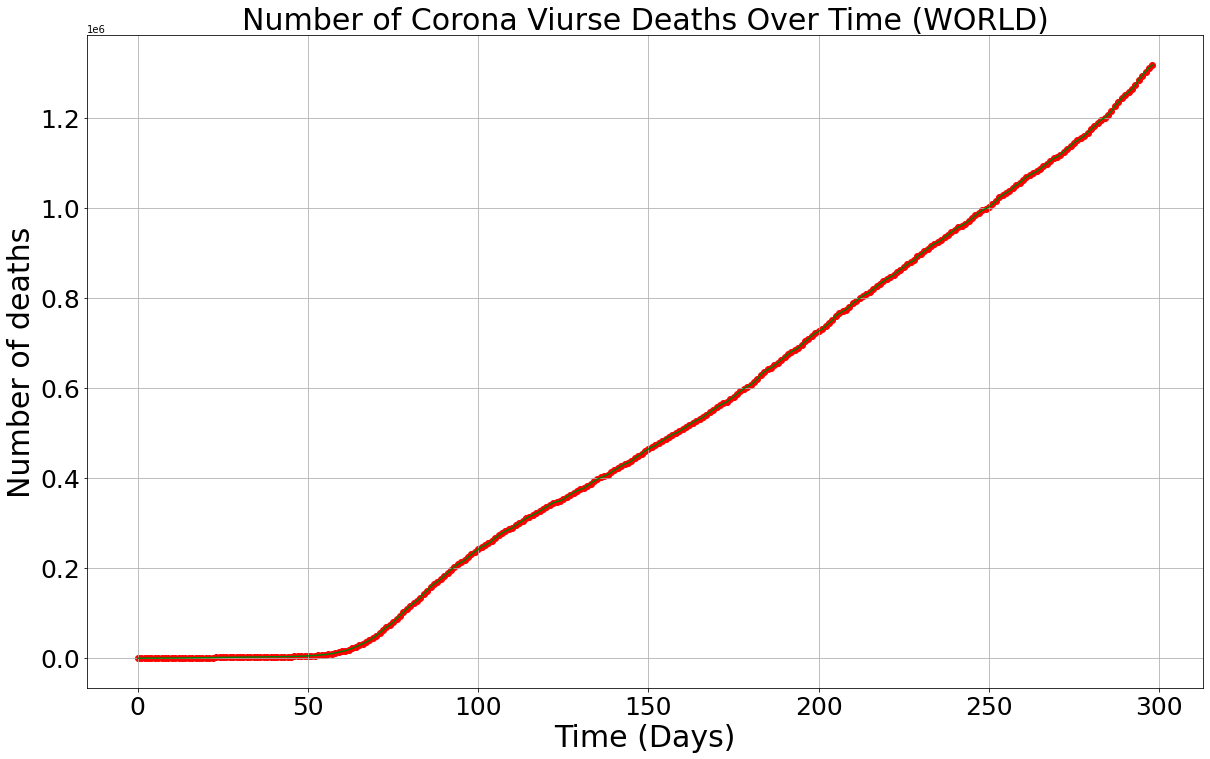

In [30]:
#total number of death overtime
plt.figure(figsize=(20,12))
plt.plot(ad_dates,total_deaths,color='green')
plt.scatter(ad_dates,total_deaths,color='red')
plt.title("Number of Corona Viurse Deaths Over Time (WORLD)",size=30)
plt.xlabel("Time (Days)",size=30)
plt.ylabel('Number of deaths',size=30)
plt.xticks(size=25)
plt.yticks(size=25)
plt.grid()
plt.show()

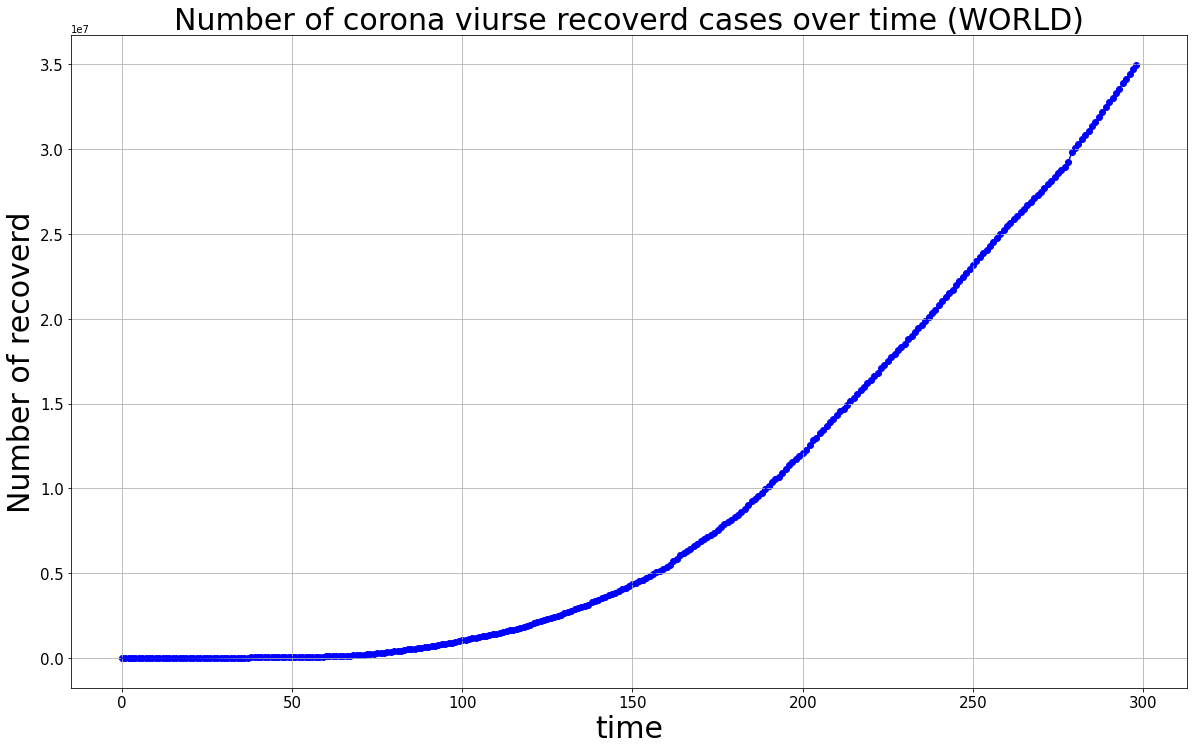

In [31]:
#total number of Recovered overtime
plt.figure(figsize=(20,12))
plt.plot(ad_dates,total_recoverd,color='blue')
plt.scatter(ad_dates,total_recoverd,color='blue')
plt.title("Number of corona viurse recoverd cases over time (WORLD)",size=30)
plt.xlabel("time",size=30)
plt.ylabel('Number of recoverd',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

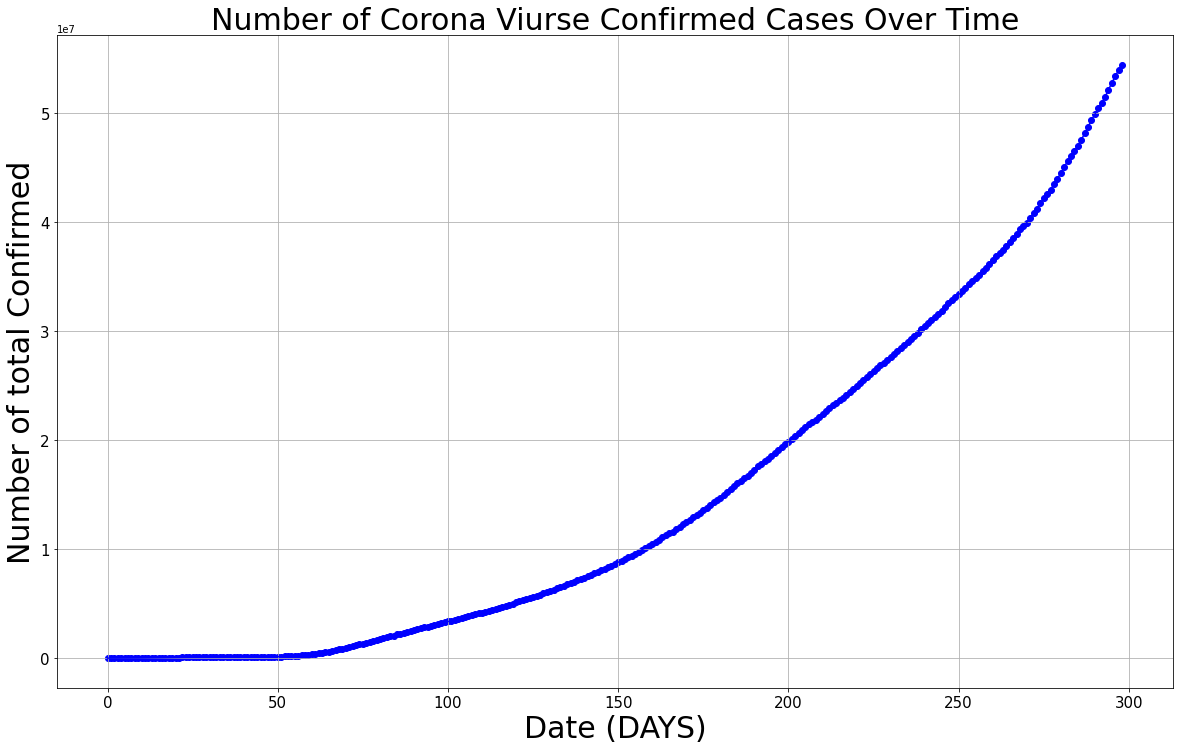

In [32]:
#Number of cases confirmed overtime
plt.figure(figsize=(20,12))
plt.plot(ad_dates,world_cases,color='blue')
plt.scatter(ad_dates,world_cases,color='blue')
plt.title("Number of Corona Viurse Confirmed Cases Over Time",size=30)
plt.ylabel("Number of total Confirmed",size=30)
plt.xlabel('Date (DAYS)',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

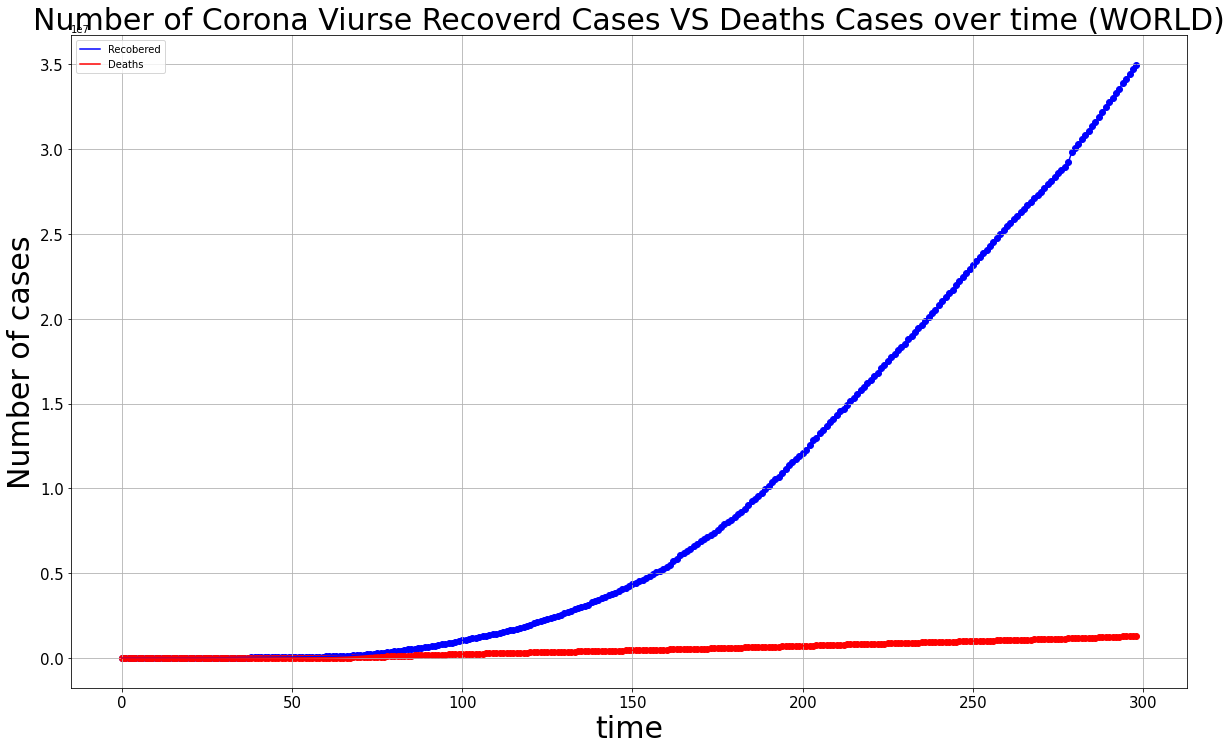

In [33]:
#total number of death vs recovered overtime
plt.figure(figsize=(20,12))
plt.plot(ad_dates,total_recoverd,color='blue')
plt.scatter(ad_dates,total_recoverd,color='blue')
plt.plot(ad_dates,total_deaths,color='r')
plt.scatter(ad_dates,total_deaths,color='r')
plt.legend(['Recobered','Deaths'],loc='best',fontsize=10)
plt.title("Number of Corona Viurse Recoverd Cases VS Deaths Cases over time (WORLD)",size=30)
plt.xlabel("time",size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

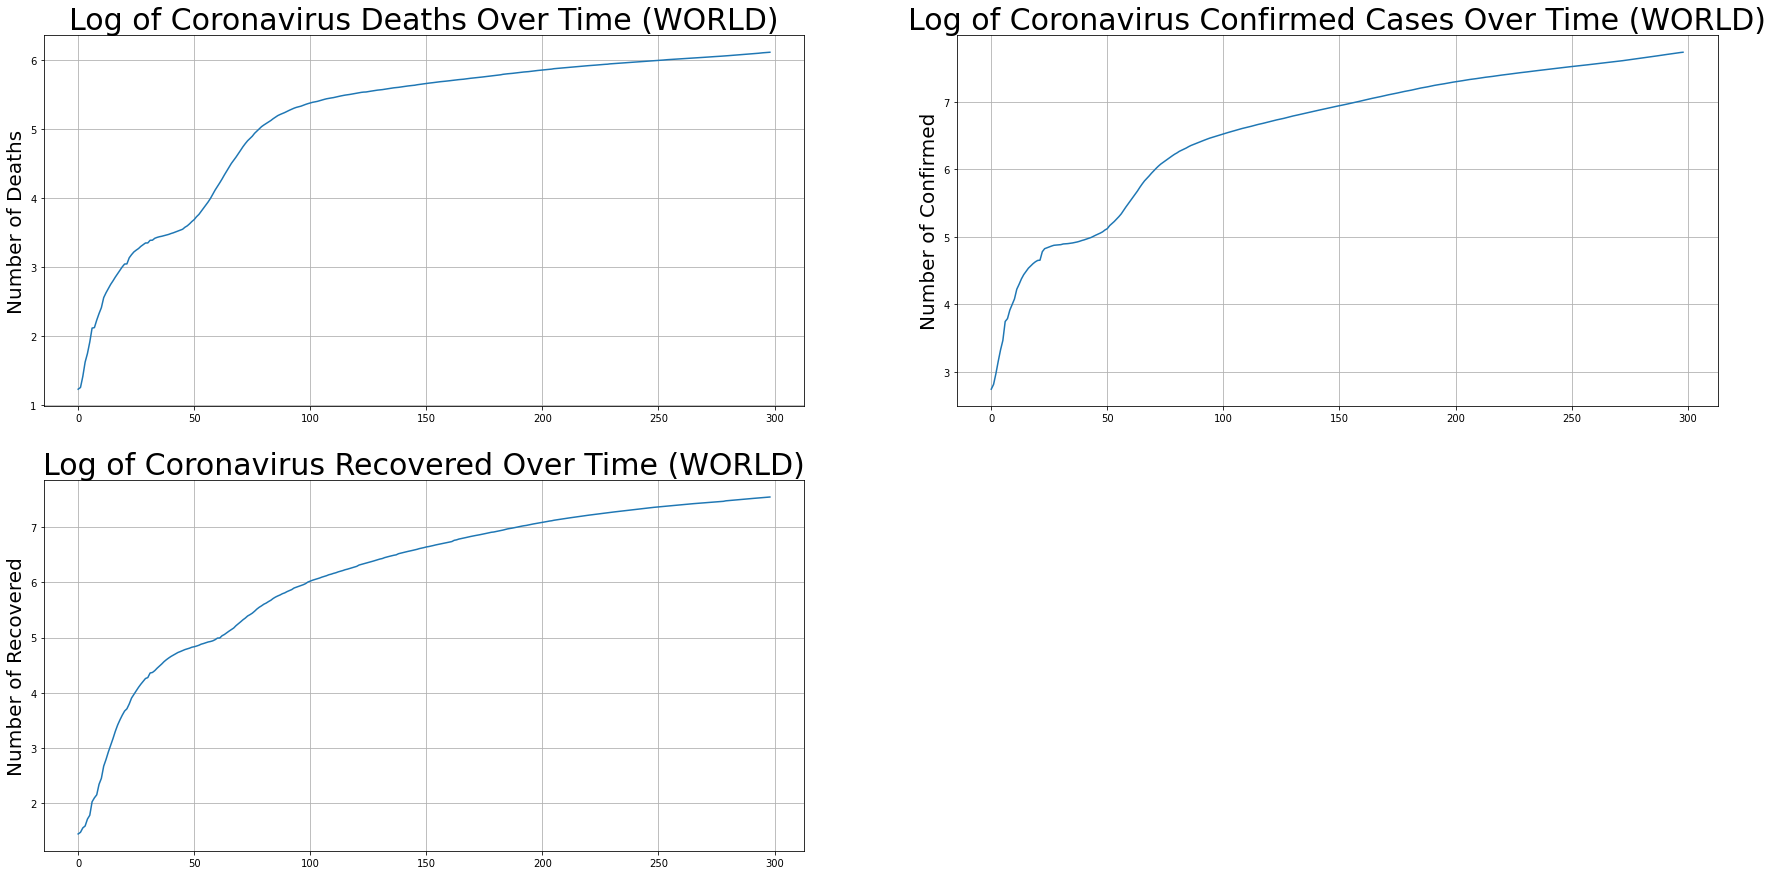

In [36]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.plot(ad_dates, np.log10(total_deaths))
plt.title('Log of Coronavirus Deaths Over Time (WORLD)',fontsize = 30,color='black')
plt.ylabel('Number of Deaths',size=20)
plt.grid()
plt.subplot(2,2,2)
plt.plot(ad_dates, np.log10(world_cases))
plt.title('Log of Coronavirus Confirmed Cases Over Time (WORLD)',fontsize = 30,color='black')
plt.ylabel('Number of Confirmed',size=20)
plt.grid()
plt.subplot(2,2,3)
plt.plot(ad_dates, np.log10(total_recoverd))
plt.title('Log of Coronavirus Recovered Over Time (WORLD)',fontsize = 30,color='black',)
plt.ylabel('Number of Recovered',size=20)
plt.grid()

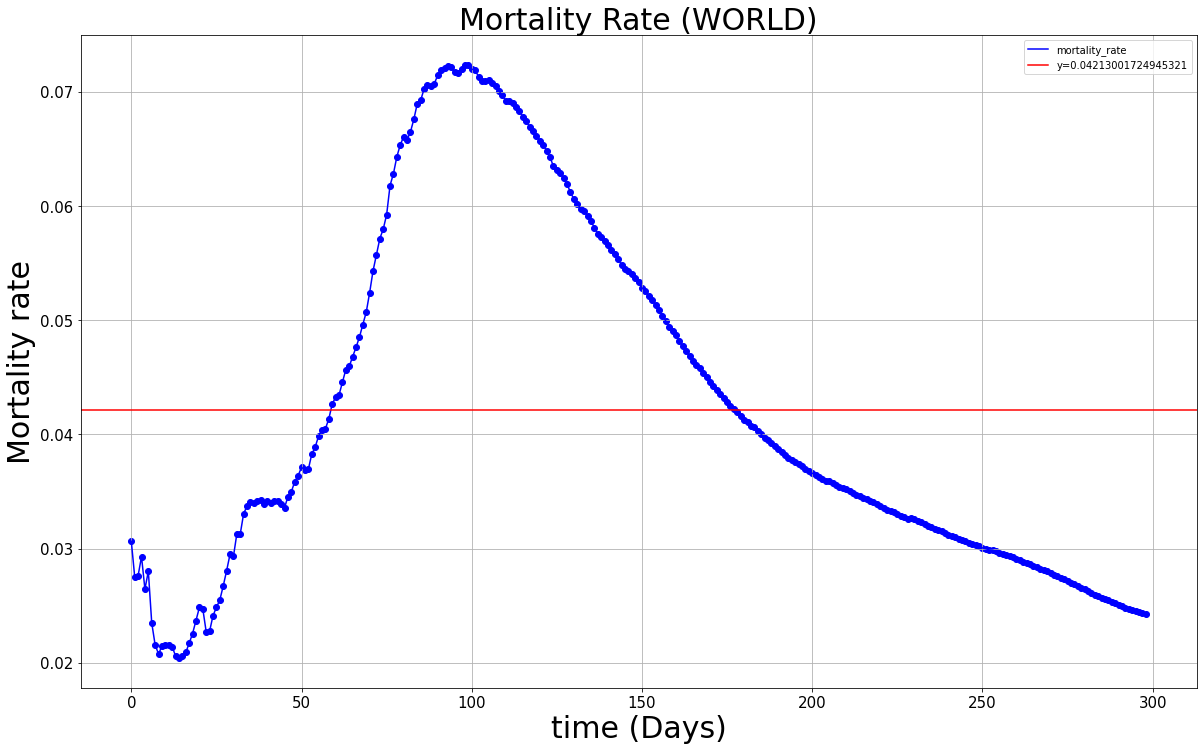

In [35]:
#total number of death overtime(mortality rate)
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(ad_dates,mortality_rate,color='blue')
plt.scatter(ad_dates,mortality_rate,color='blue')
plt.axhline(y=mean_mortality_rate,color='red')
plt.legend(['mortality_rate','y='+str(mean_mortality_rate)])
plt.title("Mortality Rate (WORLD)",size=30)
plt.xlabel("time (Days)",size=30)
plt.ylabel('Mortality rate',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

In [37]:
visual_unique_conutries=[]
visual_confrimd_cases=[]
others=np.sum(country_confirmed_cases[15:])
for i in range(len(country_confirmed_cases[:15])):
    visual_confrimd_cases.append(country_confirmed_cases[i])
    visual_unique_conutries.append(unique_countries[i])

visual_unique_conutries.append('Others')
visual_confrimd_cases.append(others)

Text(0.5, 1.0, 'Top 15 Countries with Confirmed Cases')

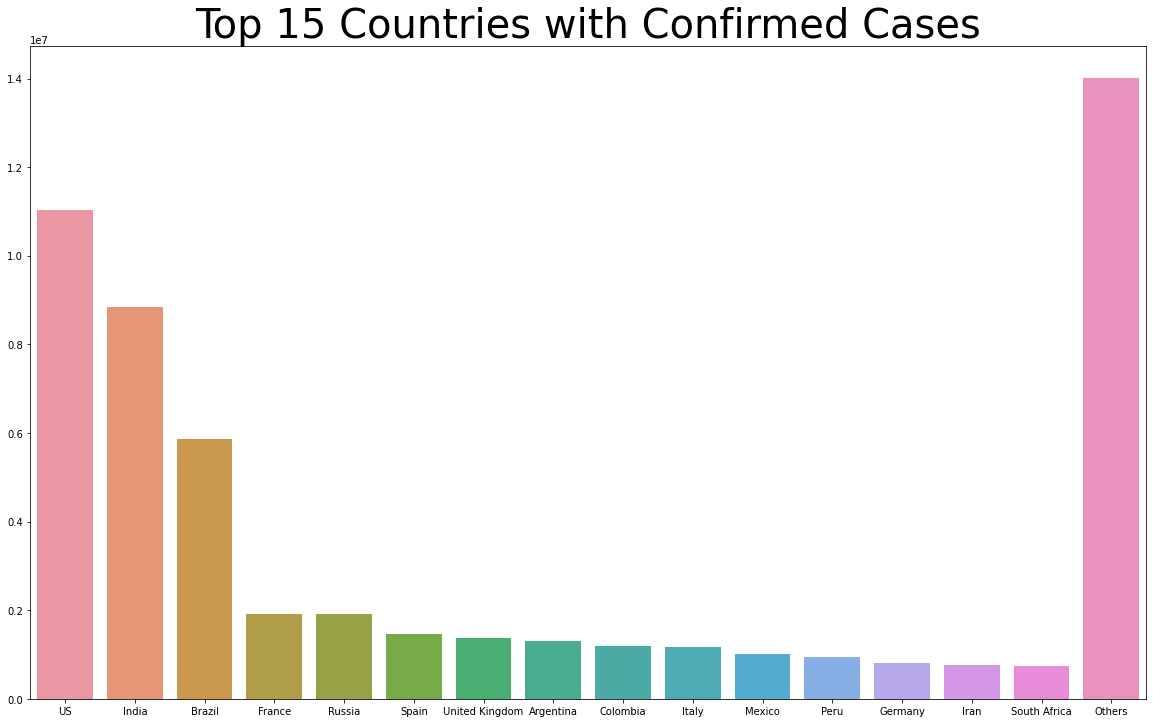

In [49]:
plt.figure(figsize=(20,12))
sns.barplot(x=visual_unique_conutries,y=visual_confrimd_cases,)
plt.title("Top 15 Countries with Confirmed Cases",fontsize=40)

# WORLD PREDICTION

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#split data for future perdiction (World)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(FromDayOne, world_cases, test_size=0.15, shuffle=True)

### Creating a linear regression model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
world_linear_model=LinearRegression(normalize=True,fit_intercept=True)
world_linear_model.fit(X_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [42]:
lr_world_test_pred=world_linear_model.predict(X_test_confirmed)
world_linear_pred=world_linear_model.predict(future_forecast)

### Metrics for error

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

In [44]:
print('Mean Absolute Error :',mean_absolute_error(lr_world_test_pred,y_test_confirmed))
print('Mean Squared Error :',mean_squared_error(lr_world_test_pred,y_test_confirmed))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(lr_world_test_pred,y_test_confirmed)))
print('Median Absolute Error :',median_absolute_error(lr_world_test_pred,y_test_confirmed))

Mean Absolute Error : 4555077.944252934
Mean Squared Error : 27201480520188.355
Root Mean Squared Error : 5215503.860624432
Median Absolute Error : 4823021.2223795615


In [45]:
from sklearn.metrics import r2_score

In [46]:
print("R2 Score = ", r2_score(lr_world_test_pred,y_test_confirmed))

R2 Score =  0.8671281850864619


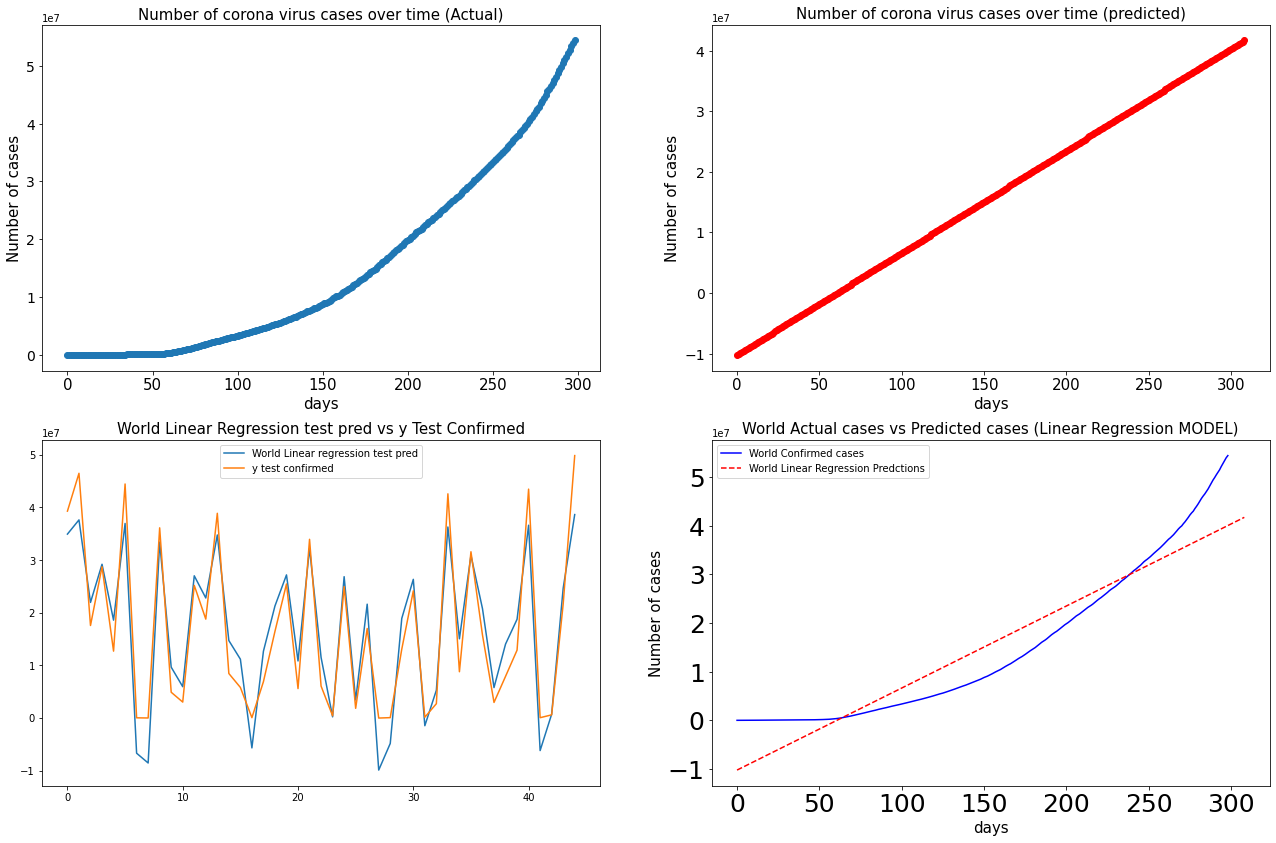

In [47]:
plt.figure(figsize=(22,14))
plt.subplot(2,2,1)
plt.plot(ad_dates,world_cases,marker='o', linestyle='dashed')

plt.title("Number of corona virus cases over time (Actual)",size=15)
plt.xlabel("days",size=15)
plt.ylabel("Number of cases",size=15)
plt.xticks(size=15)
plt.yticks(size=14)

plt.subplot(2,2,2)
plt.plot(future_forecast,world_linear_pred,marker='o', linestyle='dashed',color='red')

plt.title("Number of corona virus cases over time (predicted)",size=15)
plt.xlabel("days",size=15)
plt.ylabel("Number of cases",size=15)
plt.xticks(size=15)
plt.yticks(size=14)

plt.subplot(2,2,3)
plt.title("World Linear Regression test pred vs y Test Confirmed",size=15)
plt.plot(lr_world_test_pred)
plt.plot(y_test_confirmed)
plt.legend(["World Linear regression test pred",'y test confirmed'])
plt.subplot(2,2,4)
plt.plot(ad_dates,world_cases,color='blue')
plt.plot(future_forecast,world_linear_pred,linestyle='dashed',color='red')

plt.title("World Actual cases vs Predicted cases (Linear Regression MODEL)",size=15)
plt.xlabel("days",size=15)
plt.ylabel("Number of cases",size=15)
plt.xticks(size=25)
plt.yticks(size=25)
plt.legend(["World Confirmed cases",'World Linear Regression Predctions'])

In [48]:
#predict cases for the next 7 days

print('Linear Regression Model future prediction (WORLD CASES)')
print(' Number Of Cases  :\n\n',world_linear_pred[-7:])

Linear Regression Model future prediction (WORLD CASES)
 Number Of Cases  :

 [[40675743.11226712]
 [40844269.49391832]
 [41012795.87556951]
 [41181322.25722072]
 [41349848.63887191]
 [41518375.02052311]
 [41686901.4021743 ]]
